# K-Means Clustering algorithm 

* *What is clustering?*


* The K-means algorithm is summarized as: 
     * Set number of clusters, K
     * Initialize cluster centers
     * Do until Change in cluster centers is small:
         * FOR i = 1 to N
             * Determine the closest representative, $\Theta_j$, for $\mathbf{x}_i$
             * Set label for data point $i$ to $j$
         * FOR j = 1 to M
             * Update cluster representative $\Theta_j$ to the mean of the points with cluster label $j$



* The objective function for the K-means clustering algorithm is
\begin{equation}
J(\Theta, U) = \sum_{i=1}^N \sum_{j=1}^M u_{ij}\left\| \mathbf{x}_i - \theta_j \right\|^2
\end{equation}
where $u_{ij} \in \{0,1\}$ and is '1' for the $j$ index corresponding to the class label assigned to data point $\mathbf{x}_i$ and zero otherwise. The $\theta_j$ vector is the $j^{th}$ cluster representative.
* *How would you optimize this objective function?*



* Does the K-means algorithm find the *globally optimal* solution (i.e., the cluster centers and assignments that globally minimize the objective function)?  
* Does the K-means algorithm make any assumptions on cluster shape? 
* Given a data set with an unknown number of clusters, come up with a strategy for determining the "right" number of clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from scipy import spatial
%matplotlib inline

def KMeans(X, C):
    MaxIter     = 10000
    StopThresh  = 1e-5

    #Initialize Cluster Centers by drawing randomly from input data (can use other
    # methods for initialization...)
    N       = X.shape[0] #number of data points
    d       = X.shape[1] #dimensionality
    rp      = np.random.permutation(N) #random permutation of numbers 1:N
    centers = X[rp[0:C],:] #select first M data points sorted according to rp

    diff    = 1e100
    iter    = 0
    while((diff > StopThresh) & (iter < MaxIter)):
        #Assign data to closest cluster representative (using Euclidean distance)
        D   = spatial.distance.cdist(X, centers)
        L   = np.argmin(D, axis=1)
        
        #Update cluster centers
        centersPrev = centers.copy()
        for i in range(C):
            centers[i,:] = np.mean(X[L == i,:], axis=0)

        #Update diff & iteration count for stopping criteria
        diff = np.linalg.norm(centersPrev - centers)
        iter = iter+1
    return centers, L


Text(0.5, 1.0, 'Clustered Blobs')

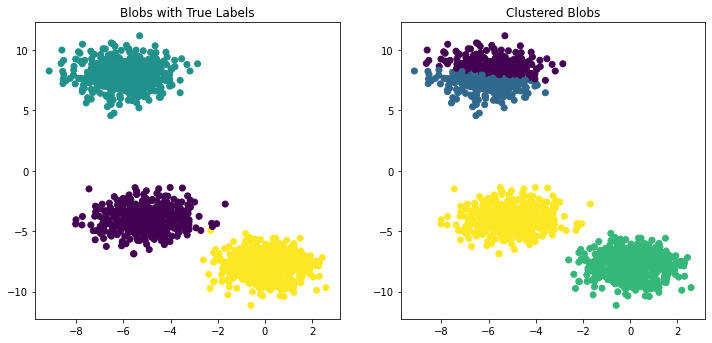

In [2]:
n_samples = 1500
n_clusters = 4

# Make Blob Data
X, y_blobs = datasets.make_blobs(n_samples=n_samples)

#Cluster
centers, L = KMeans(X,n_clusters)

#Plot Results
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_blobs)
plt.title("Blobs with True Labels")
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=L)
plt.title("Clustered Blobs")



Text(0.5,1,'Clustered Results')

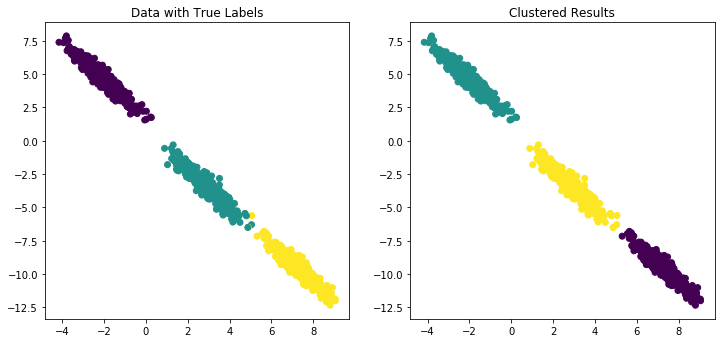

In [4]:
# Anisotropicly distributed data
#some examples from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

n_samples = 1500
n_clusters = 3

#generate data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X, y = datasets.make_blobs(n_samples=n_samples)
X = np.dot(X, transformation)

#cluster data
centers, L = KMeans(X,n_clusters)

#plot data
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data with True Labels")
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=L)
plt.title("Clustered Results")


Text(0.5,1,'Clustered Results')

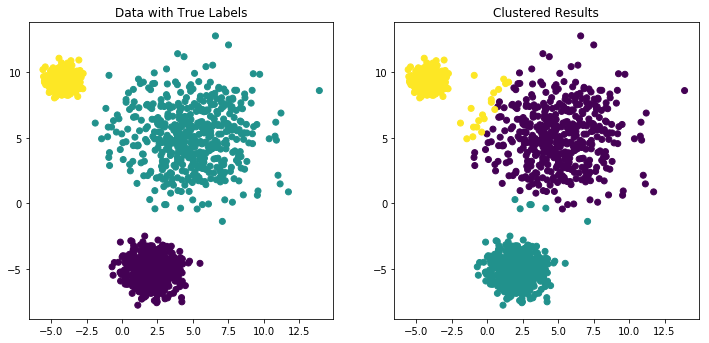

In [5]:
# Data with different variances

n_samples = 1500
n_clusters = 3

#generate data
X, y = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5])

#cluster data
centers, L = KMeans(X,n_clusters)

#plot data
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data with True Labels")
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=L)
plt.title("Clustered Results")
    

Text(0.5,1,'Clustered Results')

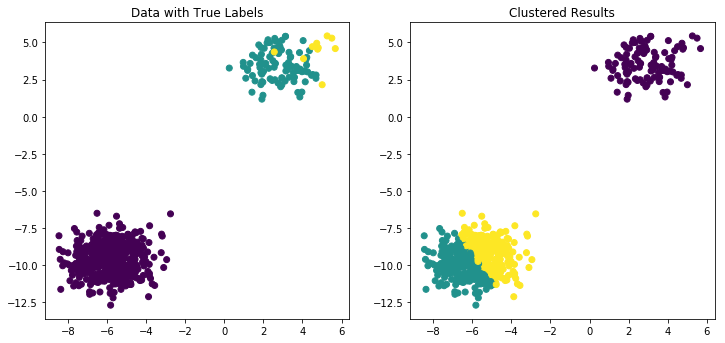

In [6]:
# Uneven sized blobs

n_samples = 1500
n_clusters = 3

#generate data
X, y = datasets.make_blobs(n_samples=n_samples)
X = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y = np.hstack((np.ones(500), 2*np.ones(100), 3*np.ones(10)))
              
#cluster data
centers, L = KMeans(X,n_clusters)

#plot data
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data with True Labels")
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=L)
plt.title("Clustered Results")
    

Text(0.5,1,'Clustered Results')

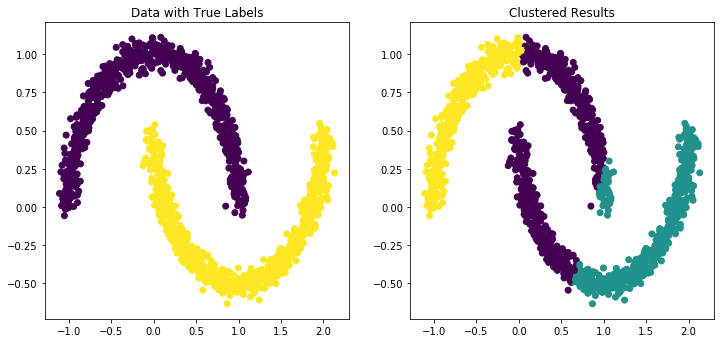

In [7]:
# Moons

n_samples = 1500
n_clusters = 3

#generate data
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

#cluster data
centers, L = KMeans(X,n_clusters)

#plot data
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data with True Labels")
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=L)
plt.title("Clustered Results")
    

Text(0.5,1,'Clustered Results')

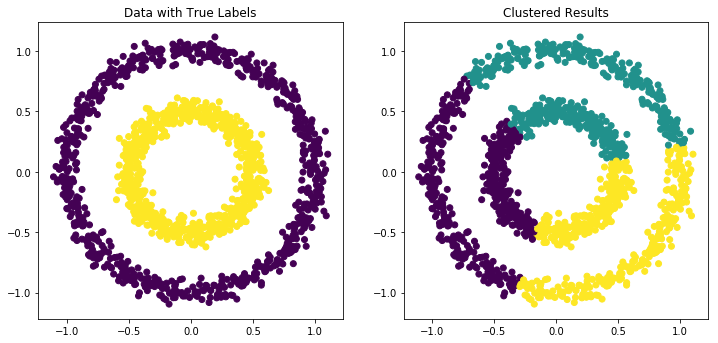

In [8]:
# Circles

n_samples = 1500
n_clusters = 3

#generate data
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

#cluster data
centers, L = KMeans(X,n_clusters)

#plot data
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Data with True Labels")
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=L)
plt.title("Clustered Results")
    

# Cluster Validity

* *How would you evaluate clustering results?*  As discussed and illustrated in our first lecture, clustering results can be subjective and/or the desired result can be application dependent. One approach is the use of *cluster validity indices*

* There are many cluster validity indices in the literature. 

* Cluster validity measures are used for a number of different goals.  For example, cluster validity metrics can be used to compare clustering results, try to determine the *correct* number of clusters, try to select the *correct* parameter settings, try to evaluate the appropriateness of the clustering result based on the data only (and not using another result or "ground truth" data). 


* *External index* is used to measure how well a clustering result matches a set of supplied class labels.  This can be used to compare to "ground truth" as well as to compare different clustering results to see how similar they are (and how stable a particular clustering is on a data set across parameter settings and/or algorithms).  An example of an external index is the Rand index: 

Given a set of $n$ data points, $\mathbf{X} = \{x_1, \ldots, x_n\}$ and two partitions (i.e., clustering results) of $\mathbf{X}$ to compare, $C = \{C_1, \ldots, C_r\}$, a partition of $\mathbf{X}$ into $r$ partitions, and $D = \{D_1, \ldots, D_s\}$, a partition of $\mathbf{X}$ into $s$ partitions, define the following:
* $a$, the number of pairs of elements in $X$ that are in the same subset in $C$ and in the same subset in $D$
* $b$, the number of pairs of elements in  $X$  that are in different subsets in $C$  and in different subsets in $D$
* $c$, the number of pairs of elements in $X$ that are in the same subset in $C$  and in different subsets in $D$
* $d$, the number of pairs of elements in  $X$  that are in different subsets in $C$  and in the same subset in $D$

The Rand index, $R$, is:
$R = \frac{a+b}{a+b+c+d}$
Intuitively,  $a + b$ can be considered as the number of agreements between $C$ and $D$ and $c + d$ as the number of disagreements between $C$ and $D$. The numerator is the number of agreements and the denominator is the total number of pairs (agreements and disagreements)

* There are many other external cluster validity indices, the Rand index is just one example!




* An *Internal index* is used to measure how well a clustering result is without using any external labels or other results. 

* Many internal indices are based on measuring within-cluster vs. between-cluster variation with the idea being within cluster variation should be small and between cluster variation should be large.  

* One example of an internal index is the Dunn's index: 


Let $C_i$ be a cluster of vectors. Let $x$ and $y$ be any two $n$ dimensional feature vectors assigned to the same cluster $C_i$.

$\Delta_i =  \text{max}_{x,y \in C_i} d(x,y)$  calculates the maximum distance in a cluster.


 Let $\delta(C_i,C_j)$ be the intercluster distance metric, between clusters $C_i$ and $C_j$.   This intercluster distance can be computed in a number of ways.  For example, the minimum distance between any two points in the cluster or, alternatively, the distance between the cluster means.

With the above notation, if there are $m$ clusters, then the Dunn Index for the set is defined as:

$\mathit{D}_m = \frac{ \underset{ 1 \leqslant i < j \leqslant m}{\text{min}} \left.\delta(C_i,C_j)\right.}{ \underset{ 1 \leqslant k \leqslant m}{\text{max}} \left.\Delta_k\right.}$

Like the intercluster distance, alternative measures for the internal cluster distance can be used.  Some examples are: 

$\Delta_i =   \dfrac{1}{|C_i| (|C_i| - 1)} {\sum}_{x , y \in C_i, x \neq y} d(x,y)$ calculates the mean distance between all pairs in a cluster. 

$\Delta_i =   \dfrac{\underset{x \in C_i}{\sum} d(x,\mu)}{|C_i|} , \mu =   \dfrac{\underset{x \in C_i}{\sum} x}{|C_i|}$ calculates the distance of all the points from the mean.
